# 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## 01 Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# importing data
path = 'I:/CF/Immersion into Data Analystics/6 Advanced Analytics and Dashboard Design/SteamGames'

In [4]:
df_steam1 = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'gamesc.xlsx'), index_col = [0])

In [5]:
# inspect data
df_steam1.shape

(62998, 38)

In [6]:
# change display options
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [7]:
df_steam1.head()

,Name,Release date,release_year,release_month,Estimated owners,Estimated owner level,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Operating Systems,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Avg playtime all,Avg playtime recent,Median playtime all,Median playtime recent,Developer,Publishers,Developer Country,Single-player,Multi-player,Co-op,PVP,Gameplay,VR,MMO,Indie,Early Access,Free to Play,Primary Genre
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1200520,Ascent Free-Roaming VR Experience,2019-12-27,2019,12,0 - 20000,1,0,0,999.00,0,True,False,False,"Windows, Linux",0,0,6,0,0,0,0,0,0,0,Fury Games,Fury Games,United States,1,1,1,0,"Single, Multi, Co-op",0,0,0,0,0,Action
253670,Aartform Curvy 3D 3.0,2013-11-12,2013,11,0 - 20000,1,0,0,299.90,0,True,False,False,"Windows, Linux",0,0,32,13,0,0,150,0,150,0,Aartform,Aartform,Germany,1,0,0,0,Single,0,0,0,0,0,Design
502570,Houdini Indie,2018-10-10,2018,10,0 - 20000,1,59,0,269.99,0,True,True,False,"Windows, Linux",0,0,141,7,0,124,0,0,0,0,SideFX,SideFX,Belgium,0,0,0,0,Unspecified,0,0,0,0,0,Design
1698340,VEGAS 19 Edit - Steam Edition,2021-09-09,2021,9,0 - 20000,1,17,0,249.00,0,True,False,False,"Windows, Linux",0,0,20,8,0,0,0,0,0,0,MAGIX Software GmbH,MAGIX Software GmbH,United Kingdom,0,0,0,0,Unspecified,0,0,0,0,0,Design
438450,3DF Zephyr Lite Steam Edition,2016-02-02,2016,2,0 - 20000,1,4,0,199.99,0,True,False,False,"Windows, Linux",0,0,60,2,0,0,0,0,0,0,3Dflow SRL,3Dflow SRL,Poland,0,0,0,0,Unspecified,0,0,0,0,0,Design


In [8]:
df_steam1['Primary Genre'].value_counts(dropna = False)

Action               25776
Adventure            11459
Casual               10916
Lewd                  3137
Simulation            2833
Other                 2530
RPG                   2053
Strategy              1894
Design                 761
Racing                 640
Violence and Gore      499
Sports                 252
Education              166
Unspecified             82
Name: Primary Genre, dtype: int64

In [9]:
# drop unnecessary columns
df_steam2 = df_steam1.drop(columns = ['Name', 'Release date', 'release_month', 'Estimated owners', 'Operating Systems', 'Publishers', 'Developer', 'Developer Country', 'Gameplay'])

In [10]:
df_steam2 = df_steam2.replace({True: 1, False: 0})

In [11]:
df_steam2.head()

,release_year,Estimated owner level,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Avg playtime all,Avg playtime recent,Median playtime all,Median playtime recent,Single-player,Multi-player,Co-op,PVP,VR,MMO,Indie,Early Access,Free to Play,Primary Genre
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1200520,2019,1,0,0,999.00,0,1,0,0,0,0,6,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,Action
253670,2013,1,0,0,299.90,0,1,0,0,0,0,32,13,0,0,150,0,150,0,1,0,0,0,0,0,0,0,0,Design
502570,2018,1,59,0,269.99,0,1,1,0,0,0,141,7,0,124,0,0,0,0,0,0,0,0,0,0,0,0,0,Design
1698340,2021,1,17,0,249.00,0,1,0,0,0,0,20,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Design
438450,2016,1,4,0,199.99,0,1,0,0,0,0,60,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Design


In [12]:
df_steam2 = df_steam2.replace({'Action': 1, 'Adventure': 2, 'Casual': 3, 'Design':4, 'Education':5, 'Lewd':6,
                              'Other': 7, 'Racing': 8, 'RPG': 9, 'Simulation': 10, 'Sports': 11, 'Strategy':12,
                              'Unspecified': 13, 'Violence and Gore': 14})

In [13]:
df_steam2.isnull().sum()

release_year              0
Estimated owner level     0
Peak CCU                  0
Required age              0
Price                     0
DLC count                 0
Windows                   0
Mac                       0
Linux                     0
Metacritic score          0
User score                0
Positive                  0
Negative                  0
Achievements              0
Recommendations           0
Avg playtime all          0
Avg playtime recent       0
Median playtime all       0
Median playtime recent    0
Single-player             0
Multi-player              0
Co-op                     0
PVP                       0
VR                        0
MMO                       0
Indie                     0
Early Access              0
Free to Play              0
Primary Genre             0
dtype: int64

## 02 Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_steam2).score(df_steam2) for i in range(len(kmeans))] 

score

[-76482240500751.1,
 -30159436284651.594,
 -13420876661581.727,
 -8946823744336.506,
 -6182050268908.104,
 -4828976981507.611,
 -3611016980808.943,
 -3074261803665.3438,
 -2664531827768.269]

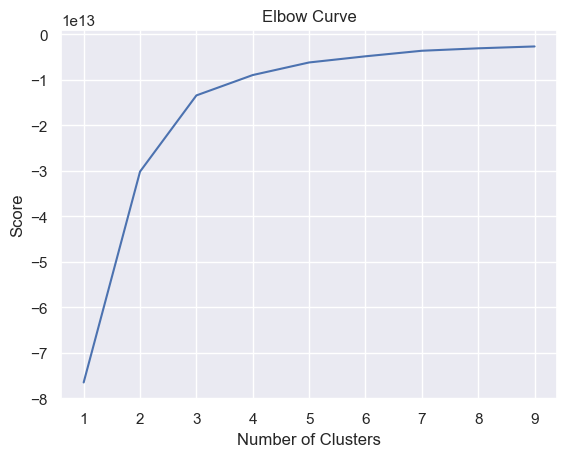

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Will use 3 clusters

## 03 k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_steam2)

KMeans(n_clusters=3)

In [19]:
df_steam2['clusters'] = kmeans.fit_predict(df_steam2)

In [20]:
df_steam2.head()

,release_year,Estimated owner level,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Avg playtime all,Avg playtime recent,Median playtime all,Median playtime recent,Single-player,Multi-player,Co-op,PVP,VR,MMO,Indie,Early Access,Free to Play,Primary Genre,clusters
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1200520,2019,1,0,0,999.00,0,1,0,0,0,0,6,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0
253670,2013,1,0,0,299.90,0,1,0,0,0,0,32,13,0,0,150,0,150,0,1,0,0,0,0,0,0,0,0,4,0
502570,2018,1,59,0,269.99,0,1,1,0,0,0,141,7,0,124,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
1698340,2021,1,17,0,249.00,0,1,0,0,0,0,20,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
438450,2016,1,4,0,199.99,0,1,0,0,0,0,60,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0


In [21]:
df_steam2['clusters'].value_counts()

0    62973
2       24
1        1
Name: clusters, dtype: int64

In [22]:
# Making list of columns for reference
df_steam2.columns

Index(['release_year', 'Estimated owner level', 'Peak CCU', 'Required age',
       'Price', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations',
       'Avg playtime all', 'Avg playtime recent', 'Median playtime all',
       'Median playtime recent', 'Single-player', 'Multi-player', 'Co-op',
       'PVP', 'VR', 'MMO', 'Indie', 'Early Access', 'Free to Play',
       'Primary Genre', 'clusters'],
      dtype='object')

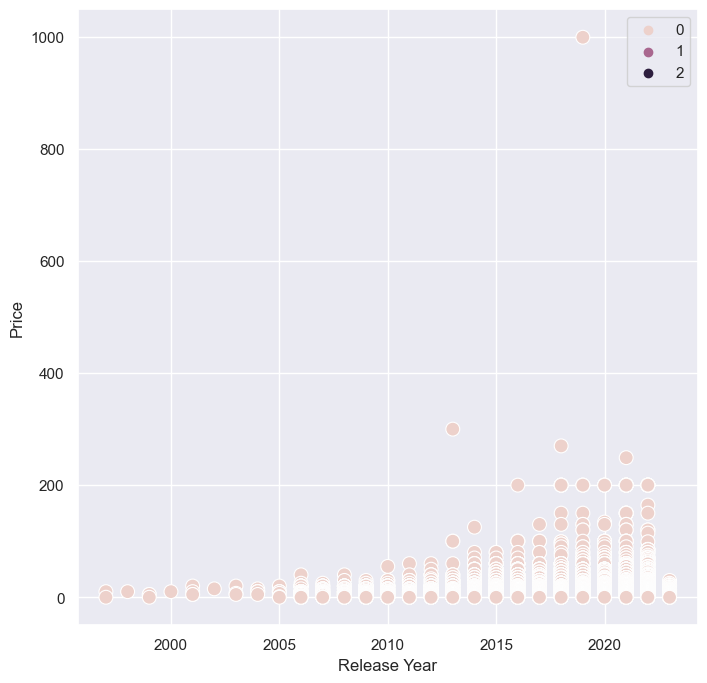

In [23]:
# Plot the clusters for the "Release year" and "price" variables.

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['release_year'], y=df_steam2['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True)
plt.xlabel('Release Year') 
plt.ylabel('Price') 
plt.show()

#### No clustering around year and price. There are a large number of variables in this dataset so I will not look at all of them. Decided to focus on positive ratings and recommendations variables.

#### Scatterplots for positive ratings 

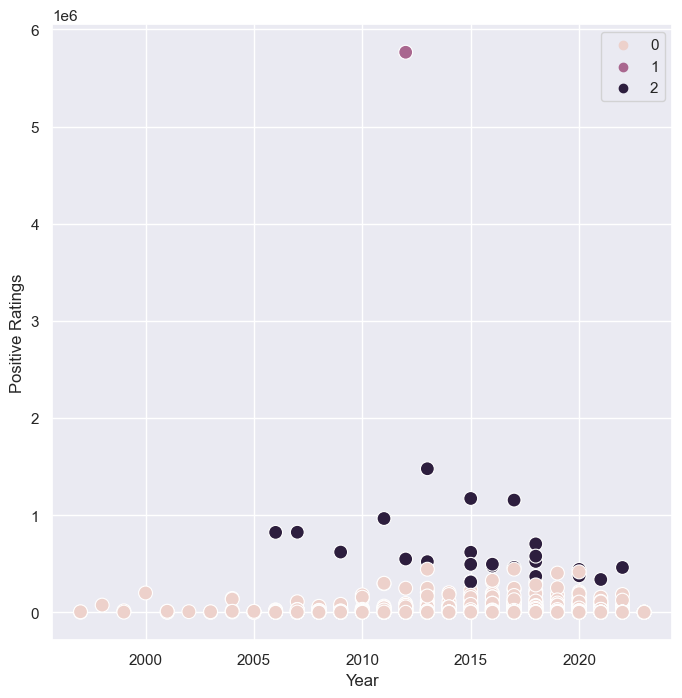

In [24]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['release_year'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Year') 
plt.show()

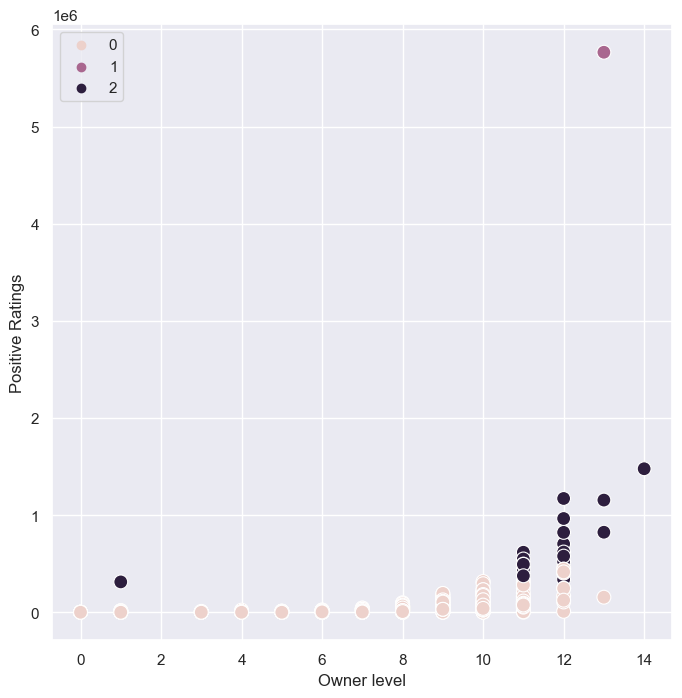

In [25]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Estimated owner level'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Owner level') 
plt.show()

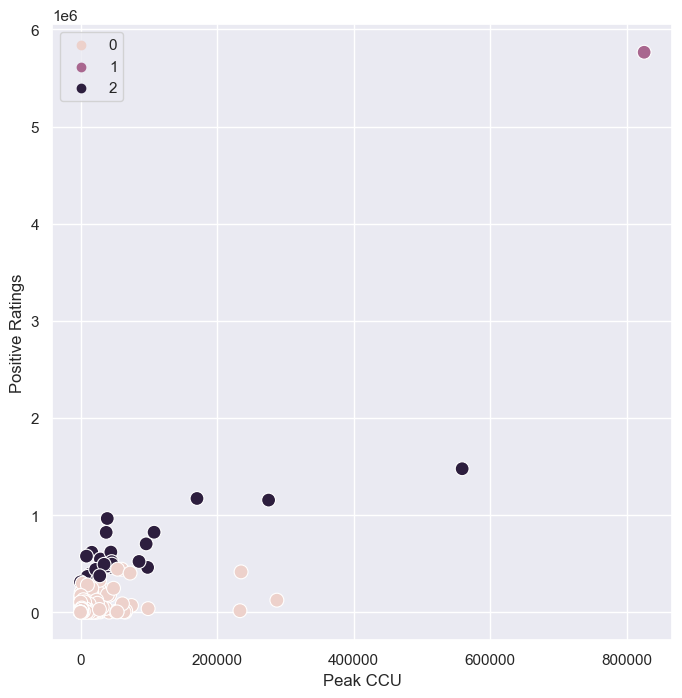

In [26]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Peak CCU'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Peak CCU') 
plt.show()

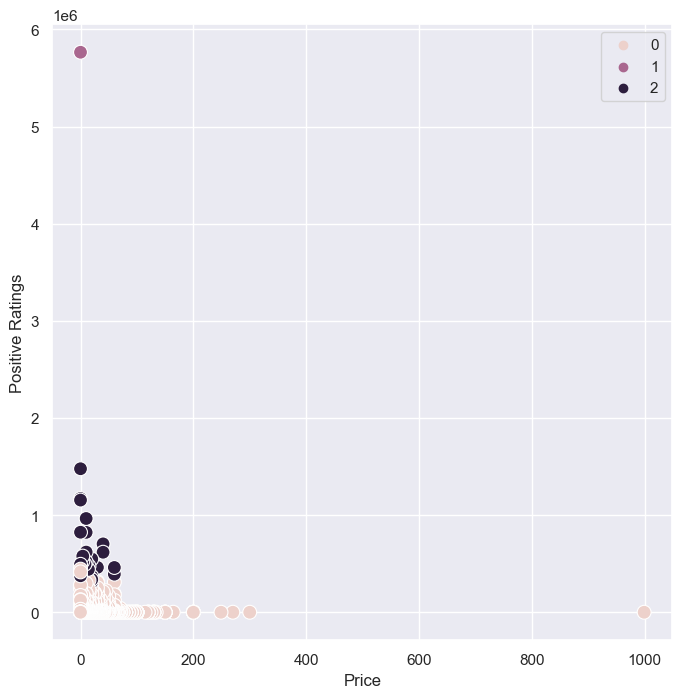

In [27]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Price'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Price') 
plt.show()

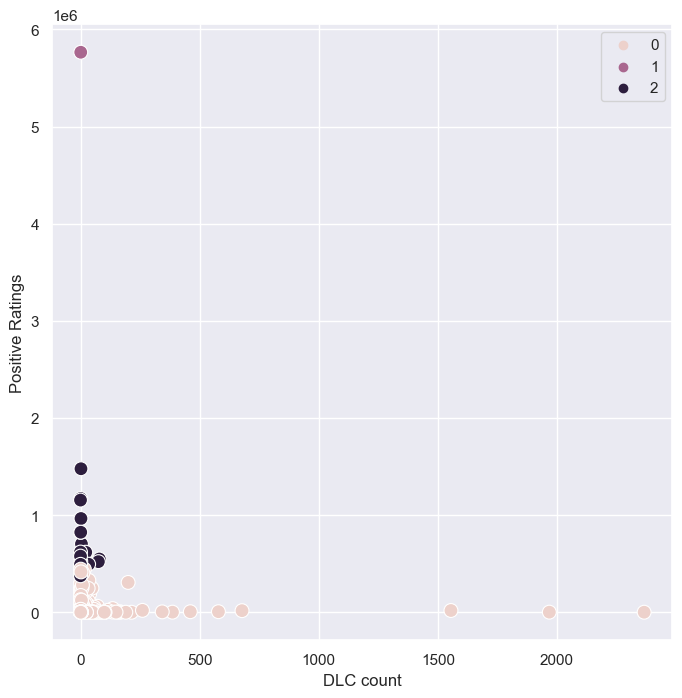

In [28]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['DLC count'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('DLC count') 
plt.show()

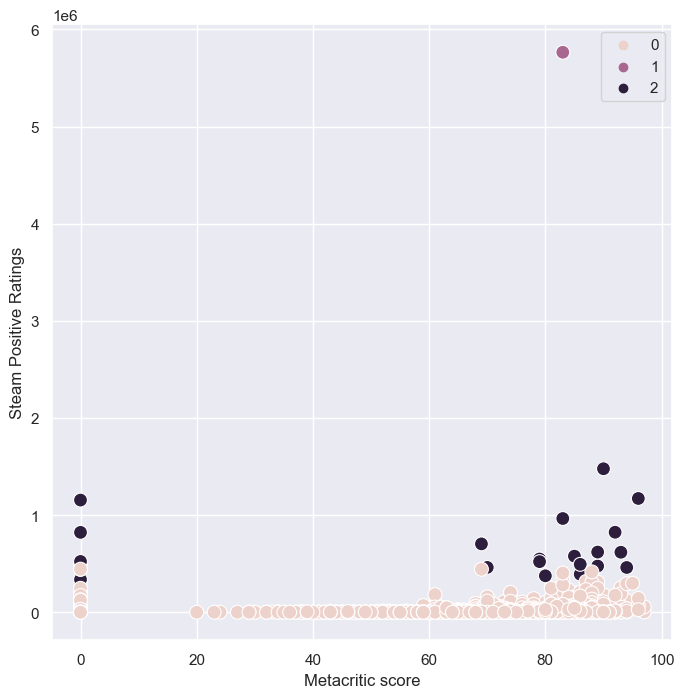

In [29]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Metacritic score'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Steam Positive Ratings') 
plt.xlabel('Metacritic score') 
plt.show()

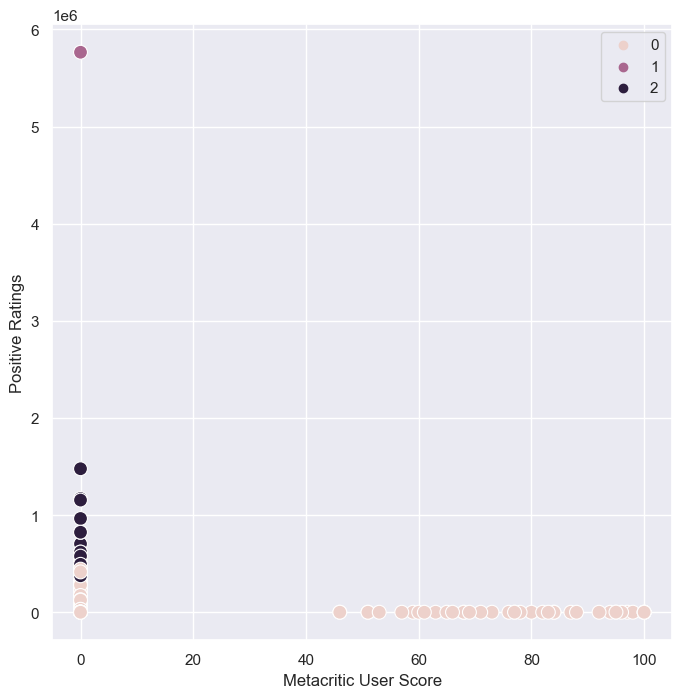

In [30]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['User score'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Metacritic User Score') 
plt.show()

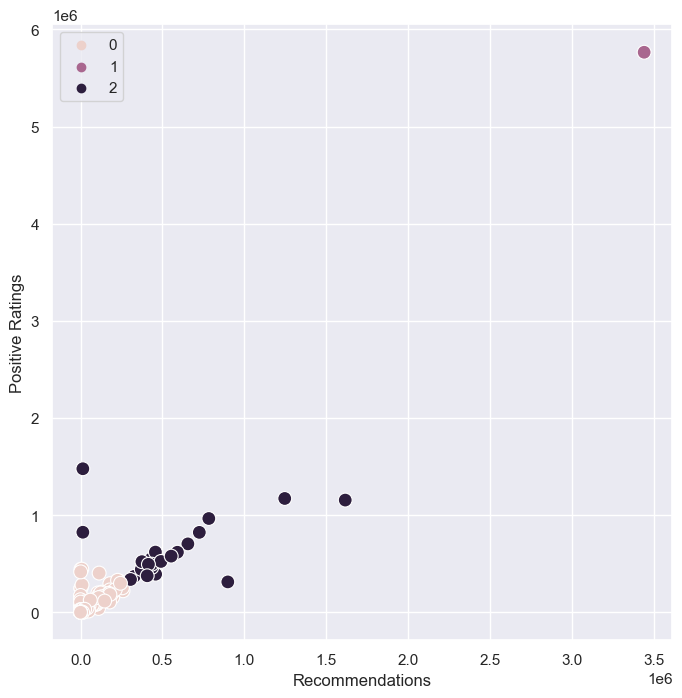

In [31]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Recommendations'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Recommendations') 
plt.show()

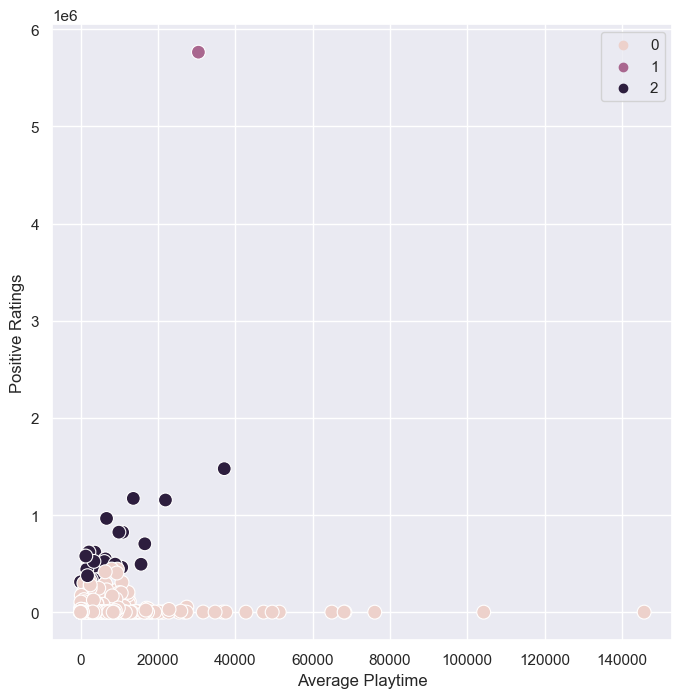

In [32]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Avg playtime all'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Average Playtime') 
plt.show()

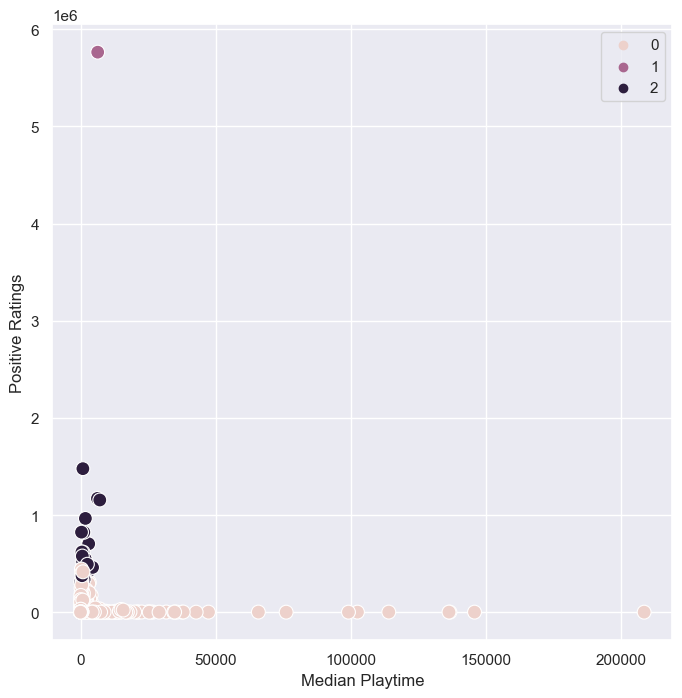

In [33]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Median playtime all'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Median Playtime') 
plt.show()

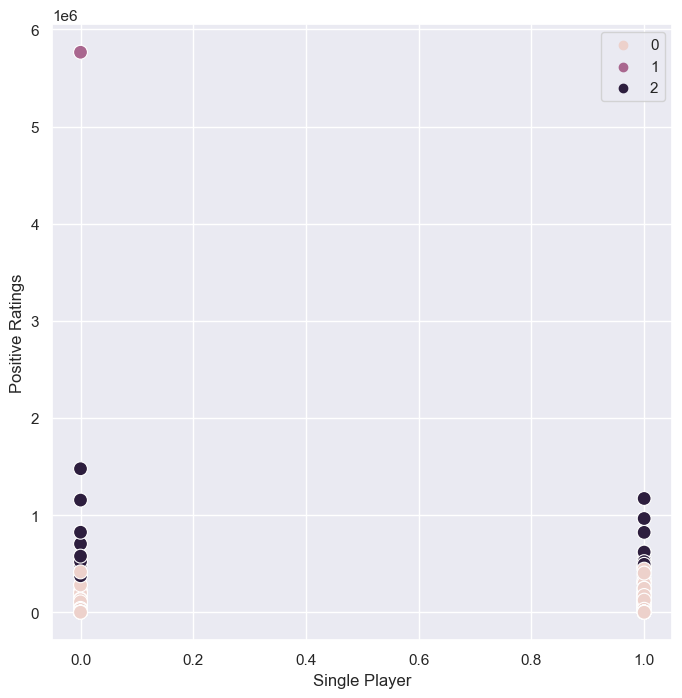

In [34]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Single-player'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Single Player') 
plt.show()


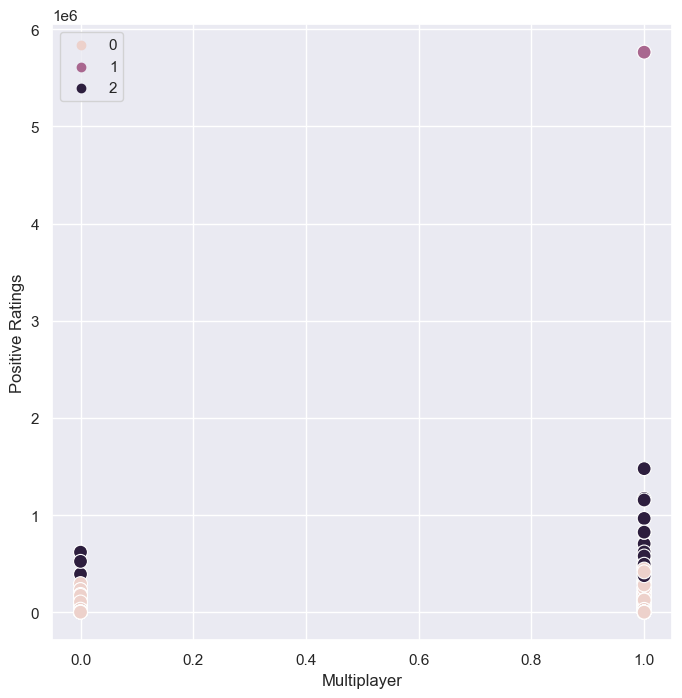

In [35]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['Positive'], x=df_steam2['Multi-player'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Multiplayer') 
plt.show()

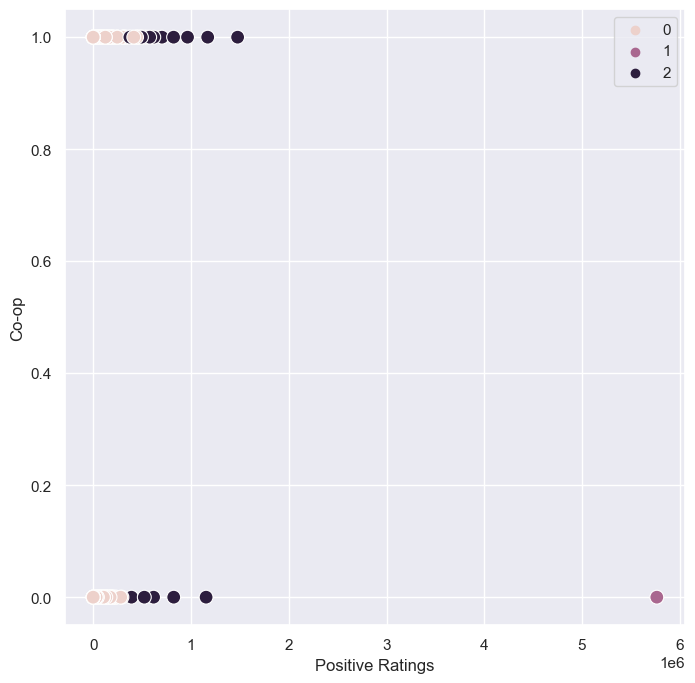

In [36]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Positive'], y=df_steam2['Co-op'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Co-op') 
plt.show()

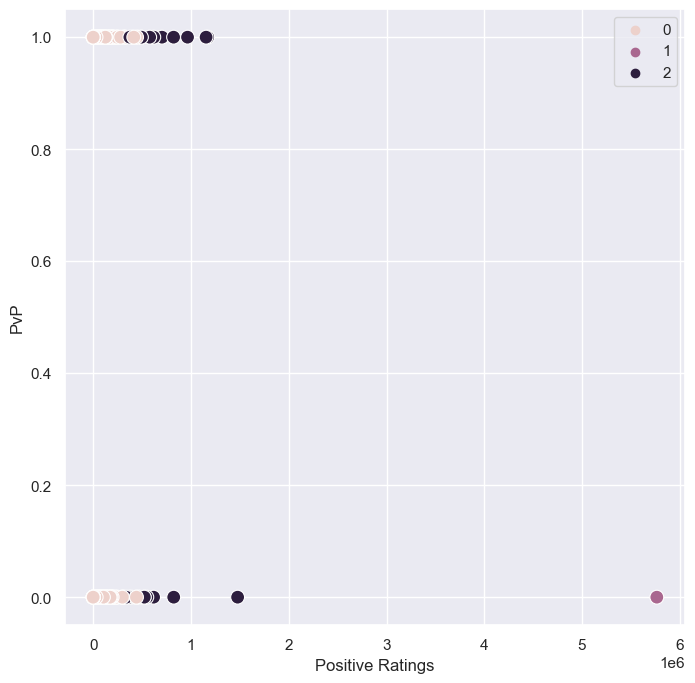

In [37]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Positive'], y=df_steam2['PVP'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('PvP') 
plt.show()

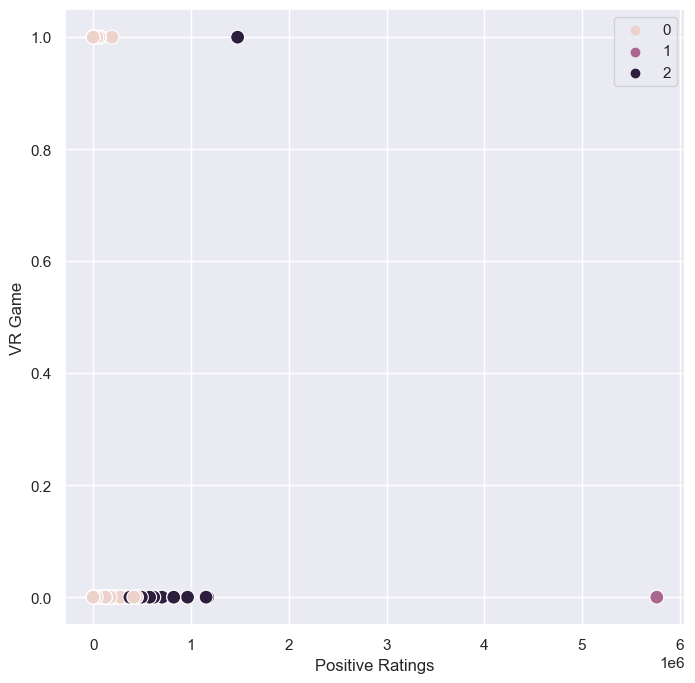

In [38]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Positive'], y=df_steam2['VR'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('VR Game') 
plt.show()

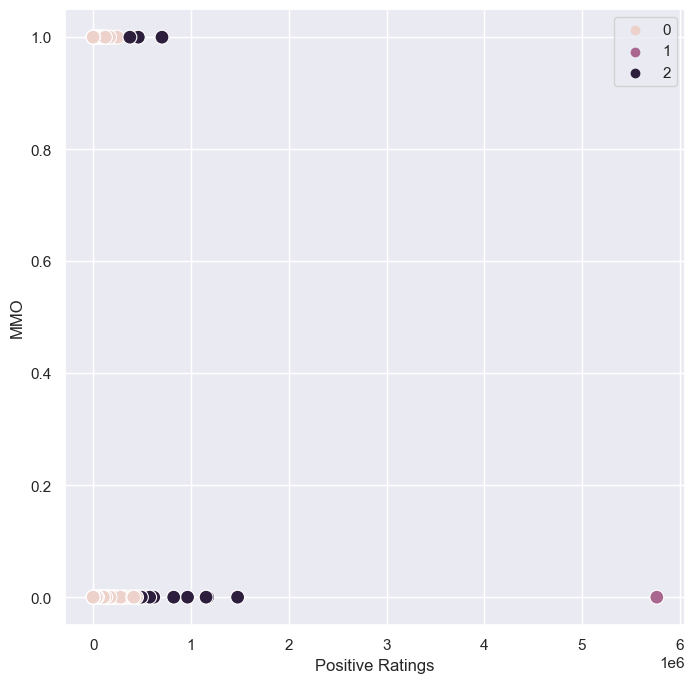

In [39]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Positive'], y=df_steam2['MMO'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('MMO') 
plt.show()

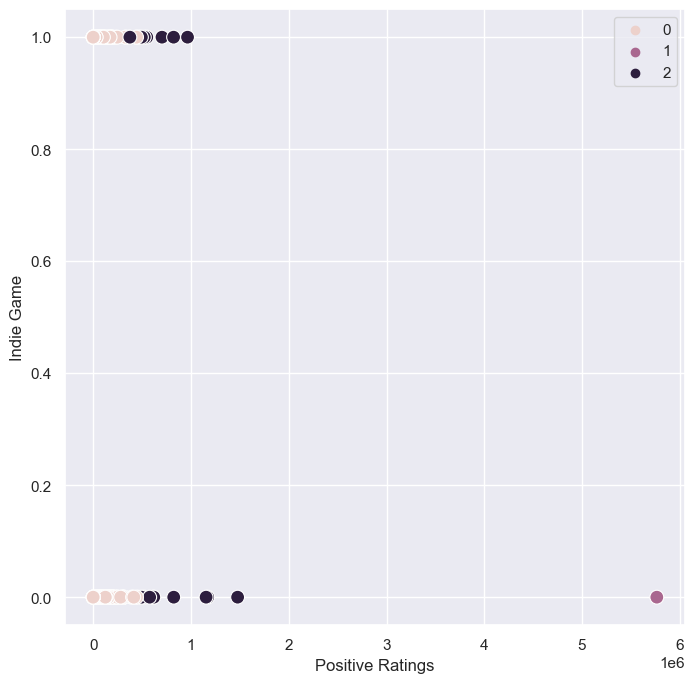

In [40]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Positive'], y=df_steam2['Indie'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Indie Game') 
plt.show()

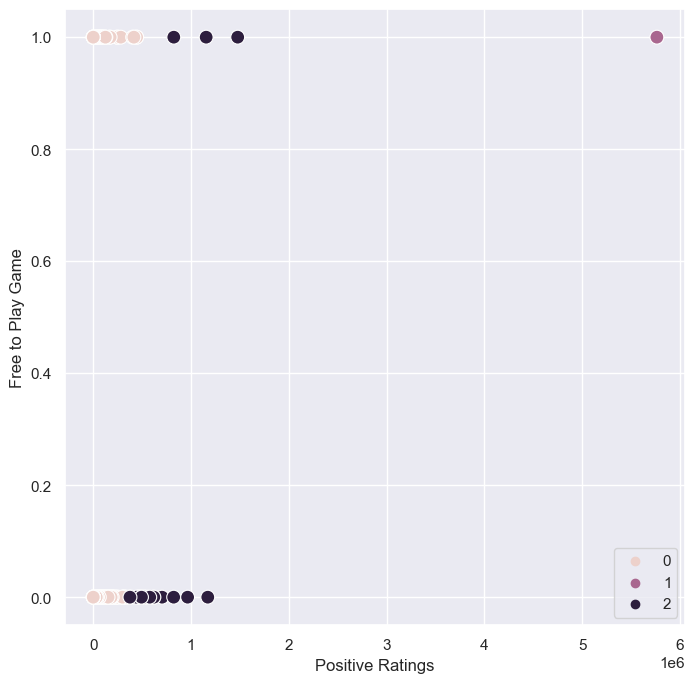

In [41]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Positive'], y=df_steam2['Free to Play'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Free to Play Game') 
plt.show()

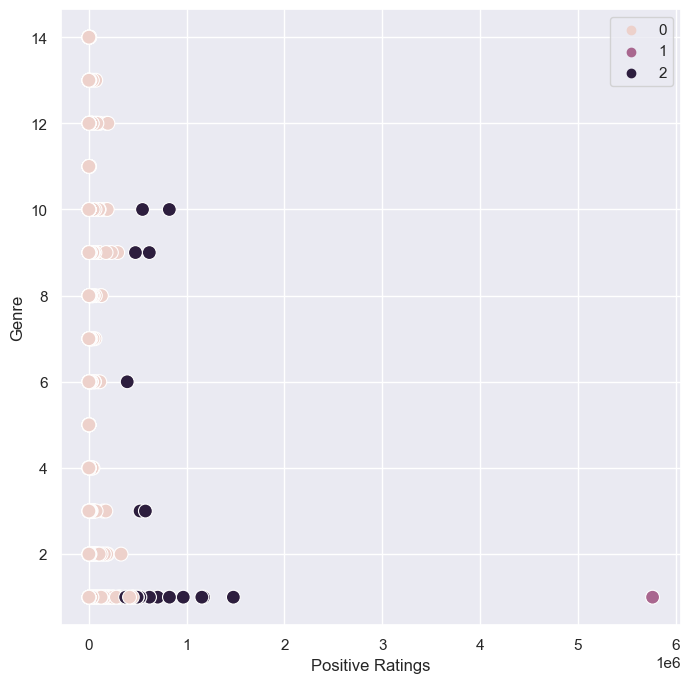

In [42]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Positive'], y=df_steam2['Primary Genre'], hue=kmeans.labels_, s=100) 


ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Genre') 
plt.show()

#### Scatterplots for Recommendations variable

#### Due to the large number of variables, I did not check all combinations of variables. The first scatter plot was between year and price and those variables showed no clustering. After that I focused on the positive ratings variables. There was an increase in positive ratings in games released after 2005 which is not suprising as Steam became available in 2003. Positive ratings also stay fairly similar for all ownership levels until after owner 11 (between 10000000 - 20000000 owners). While games with the highest peak CCU have the highest ratings, there are also many low priced games with high ratings. Game price appears to have no corrleation with ratings as there are many highly rated free and low priced games, while the most expensive game (price was verified on Steam) does not have many positive ratings. Games with lower amounts of downloadable content appear to have higher ratings than games with a lot of downloadable content. Unless the DLCs are free, it is probably annoying for most people to have to keep spending money to get them. Steam ratings and metacritic scores also do not seem to match up well until the metacritic scores exceed 75%. Finally, games whose average playtime excees 40000 minutes do not have high ratings and games with low median playtimes have higher ratings. 

## 05 Calculate descriptive statistics for the clusters

In [61]:
df_steam2.loc[df_steam2['clusters'] == 2, 'cluster'] = 'dark purple'
df_steam2.loc[df_steam2['clusters'] == 1, 'cluster'] = 'purple'
df_steam2.loc[df_steam2['clusters'] == 0, 'cluster'] = 'pink' 

In [62]:
df_steam2.groupby('cluster').agg({'release_year':['mean', 'median'],
                                  'Estimated owner level': ['mean', 'median'],
                                 'Peak CCU':['mean', 'median'], 
                                 'Price':['mean', 'median'],
                                'DLC count': ['mean', 'median'],
                                  'Metacritic score':['mean', 'median'],
                                  'User score':['mean', 'median'],
                                 'Positive': ['mean', 'median'],
                                 'Negative': ['mean', 'median'],
                                 'Achievements': ['mean', 'median'],
                                 'Recommendations': ['mean', 'median'],
                                 'Avg playtime all': ['max', 'min'],
                                 'Avg playtime recent': ['max', 'min'],
                                 'Median playtime all': ['max', 'min'],
                                 'Median playtime recent': ['max', 'min'],
                                 'Primary Genre' : ['median']})

release_year         Estimated owner level              Peak CCU  \
                    mean  median                  mean median           mean   
cluster                                                                        
dark purple  2015.500000  2016.0             11.291667   12.0   78308.166667   
pink         2018.996475  2020.0              1.825465    1.0      85.480650   
purple       2012.000000  2012.0             13.000000   13.0  825215.000000   

                           Price         DLC count        Metacritic score  \
               median       mean median       mean median             mean   
cluster                                                                      
dark purple   39437.5  16.450833   9.99  10.416667    1.0        60.125000   
pink              0.0   7.494053   4.99   0.626332    0.0         4.203865   
purple       825215.0   0.000000   0.00   1.000000    1.0        83.000000   

                   User score             Positive                  Negative  \
            median       mean median          mean     median           mean   
cluster                                                                        
dark purple   81.5   0.000000    0.0  6.307034e+05   521857.5  102719.250000   
pink           0.0   0.049069    0.0  8.759122e+02       12.0     143.606625   
purple        83.0   0.000000    0.0  5.764420e+06  5764420.0  766677.000000   

                      Achievements        Recommendations             \
               median         mean median            mean     median   
cluster                                                                
dark purple   53960.5   123.875000   43.0    5.338734e+05   435613.0   
pink              3.0    23.324647    4.0    6.620904e+02        0.0   
purple       766677.0   167.000000  167.0    3.441592e+06  3441592.0   

            Avg playtime all        Avg playtime recent       \
                         max    min                 max  min   
cluster                                                        
dark purple            37162      0                2299    0   
pink                  145727      0               19159    0   
purple                 30484  30484                 777  777   

            Median playtime all       Median playtime recent       \
                            max   min                    max  min   
cluster                                                             
dark purple                7134     0                    749    0   
pink                     208473     0                  19159    0   
purple                     6357  6357                    253  253   

            Primary Genre  
                   median  
cluster                    
dark purple           1.0  
pink                  2.0  
purple                1.0

#### According to these stats, the dark purple and purple clusters are the best out of the three clusters, although which is better depends on the variable. They are very similar for some variables as well. 